Набор данных содержит информацию о покупках в 10 различных торговых центрах в период с 2021 по 2023 год. В наборе собраны данные от различных возрастных групп и полов, чтобы предоставить комплексное представление о покупательских привычках в Стамбуле. Набор данных включает в себя важную информацию, такую как номера счетов, идентификаторы клиентов, возраст, пол, способы оплаты, категории продуктов, количество, цена, даты заказа и расположение торговых центров.


In [ ]:
import pandas as pd
import matplotlib


df = pd.read_csv('customer_shopping_data.csv', delimiter=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


Столбчатая диаграмма

In [5]:
!pip install plotly
import plotly
import plotly.graph_objs as go
import plotly.express as px

grouped_df = df.groupby('shopping_mall', as_index=False)['customer_id'].count()
grouped_df.columns = ['shopping_mall', 'count']

fig = go.Figure()
fig.add_trace(go.Bar(x=grouped_df['shopping_mall'], y=grouped_df['count'],
        marker=dict(color=grouped_df['count'], coloraxis="coloraxis", line = dict(color='black', width = 2))))
fig.update_layout(
    title={
        'text': 'Количество покупателей в торговом центре',
        'font_size': 20,
        'y': 0.96,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
    },
    width=None,
    height=700,
    margin=dict(l=0, r=0, t=70, b=0))
fig.update_xaxes(title_text='Торговый центр', title_font_size=16, tickfont_size=14, tickangle=315, gridwidth=2, gridcolor='ivory')
fig.update_yaxes(title_text='Количество покупателей', title_font_size=16, tickfont_size=14, gridwidth=2, gridcolor='ivory')

fig.show()


In [6]:
fig = px.pie(grouped_df, values='count', names='shopping_mall')
fig.update_layout(title={'text': 'Количество покупателей в торговом центре', 'font_size': 20, 'y': 0.96, 'x': 0.5,
                             'xanchor': 'center', 'yanchor': 'top'}, width=None, height=700,
                      margin=dict(l=0, r=0, t=70, b=0))
fig.update_traces(textfont_size=14, marker=dict(line=dict(color='black', width=2)))
fig.show()


Линейные графики

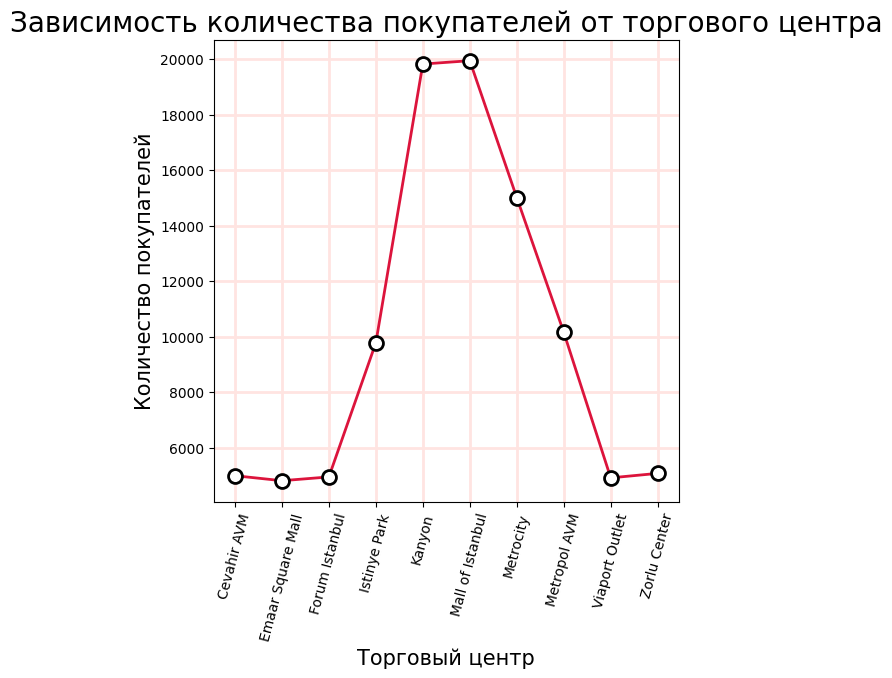

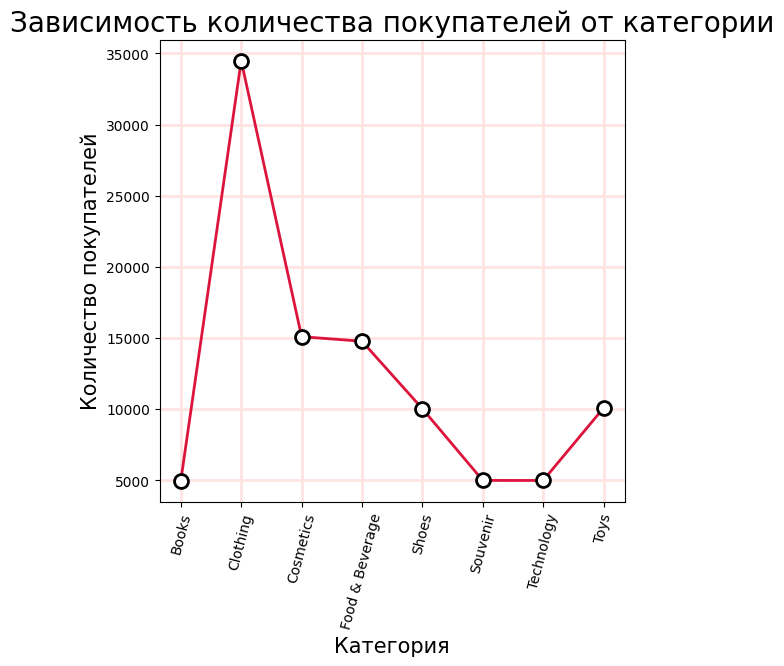

In [8]:
import numpy as np
import matplotlib.pyplot as plt
grouped1 = df.groupby(['shopping_mall'], as_index=False)['customer_id'].count()
grouped1.columns = ['shopping_mall', 'count']
grouped2 = df.groupby(['category'], as_index=False)['customer_id'].count()
grouped2.columns = ['category', 'count']
fig = plt.figure(figsize=(6,6))
plt.grid(True, linewidth=2, color='mistyrose')
plt.title('Зависимость количества покупателей от торгового центра', fontsize = 20)
plt.xlabel('Торговый центр', fontsize = 15)
plt.ylabel('Количество покупателей', fontsize = 15)
plt.xticks(rotation = 75, size = 10)
plt.yticks(size = 10)

plt.plot(grouped1['shopping_mall'],
         grouped1['count'],
         color='crimson',
         linewidth=2,
         marker='o',
         markersize=10,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)

plt.show()
fig = plt.figure(figsize=(6,6))
plt.grid(True, linewidth=2, color='mistyrose')
plt.title('Зависимость количества покупателей от категории', fontsize = 20)
plt.xlabel('Категория', fontsize = 15)
plt.ylabel('Количество покупателей', fontsize = 15)
plt.xticks(rotation = 75, size = 10)
plt.yticks(size = 10)

plt.plot(grouped2['category'],
         grouped2['count'],
         color='crimson',
         linewidth=2,
         marker='o',
         markersize=10,
         markerfacecolor='white',
         markeredgecolor='black',
         markeredgewidth=2)

plt.show()